,USB2+F01863_1:101,Intensity
0,594.770,-124.78
1,594.952,-124.78
2,595.134,-124.78
3,595.316,-209.04
4,595.498,-187.97
...,...,...
2043,899.756,186.51
2044,899.869,113.95
2045,899.983,223.96
2046,900.097,153.74


<Axes: title={'center': 'Intensity v. Wavelength(nm)'}, xlabel='USB2+F01863_1:101'>

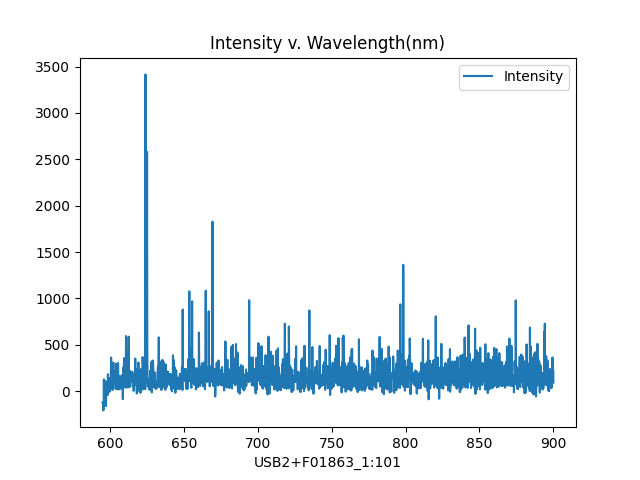

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#  Make the notebook display matplotlib graphs
%matplotlib widget

def read_ocean_optics(file_path):
    df = pd.read_csv(file_path, sep='\t')
    # "C:\Users\jrsha\UIUC\Abbamonte_research\Data\11.13\ex2_uv_shined_on 1s int time\black_table.txt"
    df.rename( columns={'Unnamed: 1':'Intensity'}, inplace=True )
    df.drop('Unnamed: 2', axis=1, inplace=True)
    return df

df = read_ocean_optics("C:/Users/jrsha/UIUC/Abbamonte_research\Data/11.13/ex2_uv_shined_on 1s int time/black_table.txt")
display(df)

df.plot(x='USB2+F01863_1:101', kind='line', title="Intensity v. Wavelength(nm)")


testing

,USB2+F01863_1:101,Intensity
0,594.770,-178.61
1,594.952,-178.61
2,595.134,-178.61
3,595.316,-169.25
4,595.498,-183.29
...,...,...
2043,899.756,219.28
2044,899.869,106.93
2045,899.983,238.00
2046,900.097,149.06


[0.99392107]


<Axes: title={'center': 'Intensity v. Wavelength(nm)'}, xlabel='USB2+F01863_1:101'>

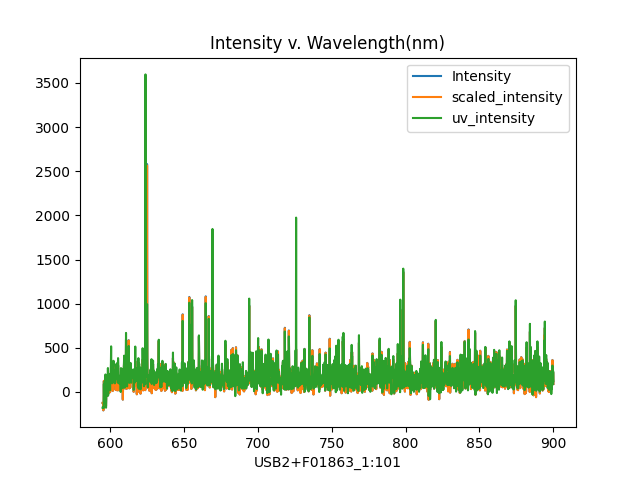

In [38]:
from scipy.optimize import curve_fit
df_uvlight = read_ocean_optics("C:/Users/jrsha/UIUC/Abbamonte_research\Data/11.13/ex2_uv_shined_on 1s int time/stilbene2.txt")
display(df_uvlight)

def scale_func(x, a):
    return a * x
popt, _ = curve_fit(scale_func, df['Intensity'], df_uvlight['Intensity'])

print(popt)

df['scaled_intensity'] = df['Intensity'] * popt[0]
df['uv_intensity'] = df_uvlight["Intensity"]

df.plot(x='USB2+F01863_1:101', kind='line', title="Intensity v. Wavelength(nm)")


# def func(x, a):
#     return abs(a) * df_uvlight['Intensity'].loc[df_uvlight['USB2+F01863_1:101'] == x].iloc[0]

# popt, pcov = curve_fit(func, df_uvlight['USB2+F01863_1:101'], df_uvlight['Intensity'])

# print (popt)
# def func2(x):
#     return popt[0] * df_uvlight[df_uvlight['USB2+F01863_1:101'] == x]['Intensity'].iloc[0]

# %matplotlib widget
# df['why'] = df['USB2+F01863_1:101'].apply(func2)
# df.plot(x='USB2+F01863_1:101', kind='line', title="Intensity v. Wavelength(nm)")
# plt.plot(df['USB2+F01863_1:101'], df['USB2+F01863_1:101'].apply(func2))
# plt.plot(df['USB2+F01863_1:101'], func(df['USB2+F01863_1:101'], *popt), 'r-',
#          label='fit: a=%5.3f, b=%5.3f, c=%5.3f' % tuple(popt))